In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("imported")

imported


In [2]:
# reading the csv file
df = pd.read_csv('loangrant.csv')
df.head()

C:\Users\izza\AppData\Local\Temp\ipykernel_11504\3135469601.py:2: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loangrant.csv')


,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [3]:
print(len(df.columns))

19


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

In [5]:
df.describe() # for numerical data

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,1.111070e+05,89769.000000,8.976900e+04,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,110879.00000,111096.000000
mean,1.147718e+07,1075.795029,7.248600e+04,18.201003,34.902272,11.125105,0.168027,1.548314e+04,0.11766,0.029353
std,3.185508e+07,1474.133505,5.593094e+04,7.014495,21.970696,5.010267,0.484212,1.982115e+04,0.35142,0.260575
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000
25%,8.162000e+03,705.000000,4.468800e+04,13.500000,16.000000,8.000000,0.000000,5.905000e+03,0.00000,0.000000
50%,1.418300e+04,724.000000,6.175200e+04,16.900000,32.000000,10.000000,0.000000,1.102700e+04,0.00000,0.000000
75%,2.382200e+04,741.000000,8.688700e+04,21.700000,51.000000,14.000000,0.000000,1.933800e+04,0.00000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.00000,15.000000


In [6]:
# for non-numerical data
df.describe(include='object')

,Loan ID,Customer ID,Loan Status,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Maximum Open Credit
count,111107,111107,111107,111107,106414,111107,111107,111107,111107
unique,88910,88910,2,2,11,4,16,90362,67309
top,341b63ee-0f6e-46c6-b7de-1ba68c44b178,cfd59fd2-454f-45c7-9a29-17f87fc0f768,Fully Paid,Short Term,10+ years,Home Mortgage,Debt Consolidation,0,0
freq,2,2,85934,80274,34551,53818,87277,55,450


In [7]:
# finding the missing values
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

## dealing with missing values for credit score

c:\Users\izza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\izza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

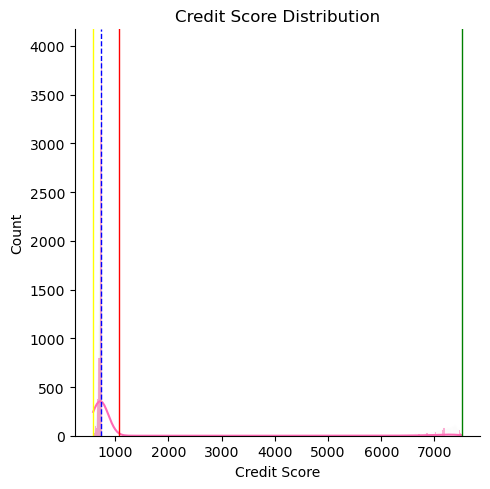

In [8]:
# histogram for credit score 
plt.figure(figsize=(10, 5))
m = sns.displot(data=df["Credit Score"],
                kind="hist",
             kde=True,
             color="hotpink")
plt.title("Credit Score Distribution")


def specs(x, **kwargs):
    """function to add mean and median lines to the histogram"""
    plt.axvline(x.mean(), c='red', ls='-', lw=1) # the red line is the mean
    plt.axvline(x.median(), c='blue', ls='--', lw=1) # the blue line is the median
    plt.axvline(x.max(), c='green', ls='-', lw=1) # the green line is the max
    plt.axvline(x.min(), c='yellow', ls='-', lw=1) # the yellow line is the min

m.map(specs, "Credit Score")
plt.show()

In [9]:
# acc to the above figure we can see that the data is right skewed
# so we will use median to fill the missing values

print(f"Number of Credit Score missing values: {df['Credit Score'].isnull().sum()}")

median = df['Credit Score'].median()
print(f"Median of Credit Score: {median}")

df['Credit Score'] = df['Credit Score'].fillna(median)

print(f"Number of Credit Score missing values after filling: {df['Credit Score'].isnull().sum()}\n")

print(df['Credit Score'].head(10))

Number of Credit Score missing values: 21338
Median of Credit Score: 724.0
Number of Credit Score missing values after filling: 0

0    7280.0
1    7330.0
2    7240.0
3    7400.0
4    6860.0
5    7420.0
6    7420.0
7    6630.0
8    7360.0
9    6720.0
Name: Credit Score, dtype: float64


## dealing with missing values for Annual Income

In [10]:
df["Annual Income"].describe()

count    8.976900e+04
mean     7.248600e+04
std      5.593094e+04
min      4.033000e+03
25%      4.468800e+04
50%      6.175200e+04
75%      8.688700e+04
max      8.713547e+06
Name: Annual Income, dtype: float64

c:\Users\izza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\izza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


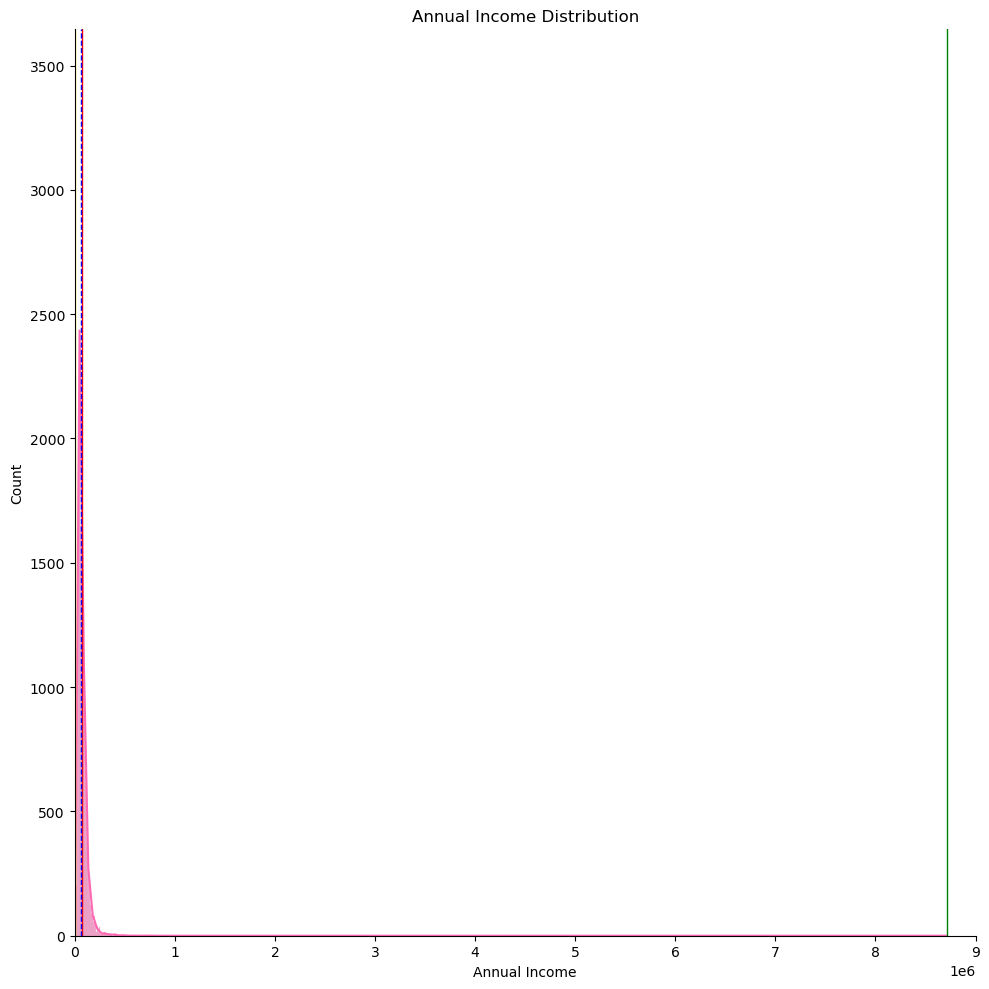

In [11]:
# histogram for annual income
# sns.set_theme(rc = {'figure.figsize':(20,5)})
m = sns.displot(data=df["Annual Income"],
                kind="hist",
             kde=True,
             color="hotpink",
             height=10,
             )
plt.title("Annual Income Distribution")


# red line is mean
# blue line is median

m.set(xlim=(0, 9000000)) # adjusting the x-axis limits based on the data's min and max
m.map(specs, "Annual Income")
plt.show()

In [12]:
# data is right skewed
# so we will use median to fill the missing values

print(f"Number of Annual Income missing values: {df['Annual Income'].isnull().sum()}")

median = df['Annual Income'].median()
print(f"Median of Annual Income: {median}")

df['Annual Income'] = df['Annual Income'].fillna(median)

print(f"Number of Annual Income missing values after filling: {df['Annual Income'].isnull().sum()}\n")

print(df['Annual Income'].head(10))

Number of Annual Income missing values: 21338
Median of Annual Income: 61752.0
Number of Annual Income missing values after filling: 0

0    46643.0
1    81099.0
2    60438.0
3    34171.0
4    47003.0
5    70475.0
6    58074.0
7    49180.0
8    50945.0
9    58776.0
Name: Annual Income, dtype: float64


## filling in missing values for tax lien

In [13]:
df["Tax Liens"].describe()

count    111096.000000
mean          0.029353
std           0.260575
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: Tax Liens, dtype: float64

In [14]:
# number of missing values
print(f"Number of Tax Liens missing values: {df['Tax Liens'].isnull().sum()}")

Number of Tax Liens missing values: 11


In [15]:
mode = df['Tax Liens'].mode()
print(f"Mode of Tax Liens: {mode}")
# checking to see how many times the mode appears
print(df['Tax Liens'].value_counts())


Mode of Tax Liens: 0    0.0
Name: Tax Liens, dtype: float64
Tax Liens
0.0     108964
1.0       1485
2.0        408
3.0        124
4.0         66
5.0         19
6.0         12
7.0          7
9.0          5
8.0          2
11.0         2
15.0         1
10.0         1
Name: count, dtype: int64


c:\Users\izza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\izza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


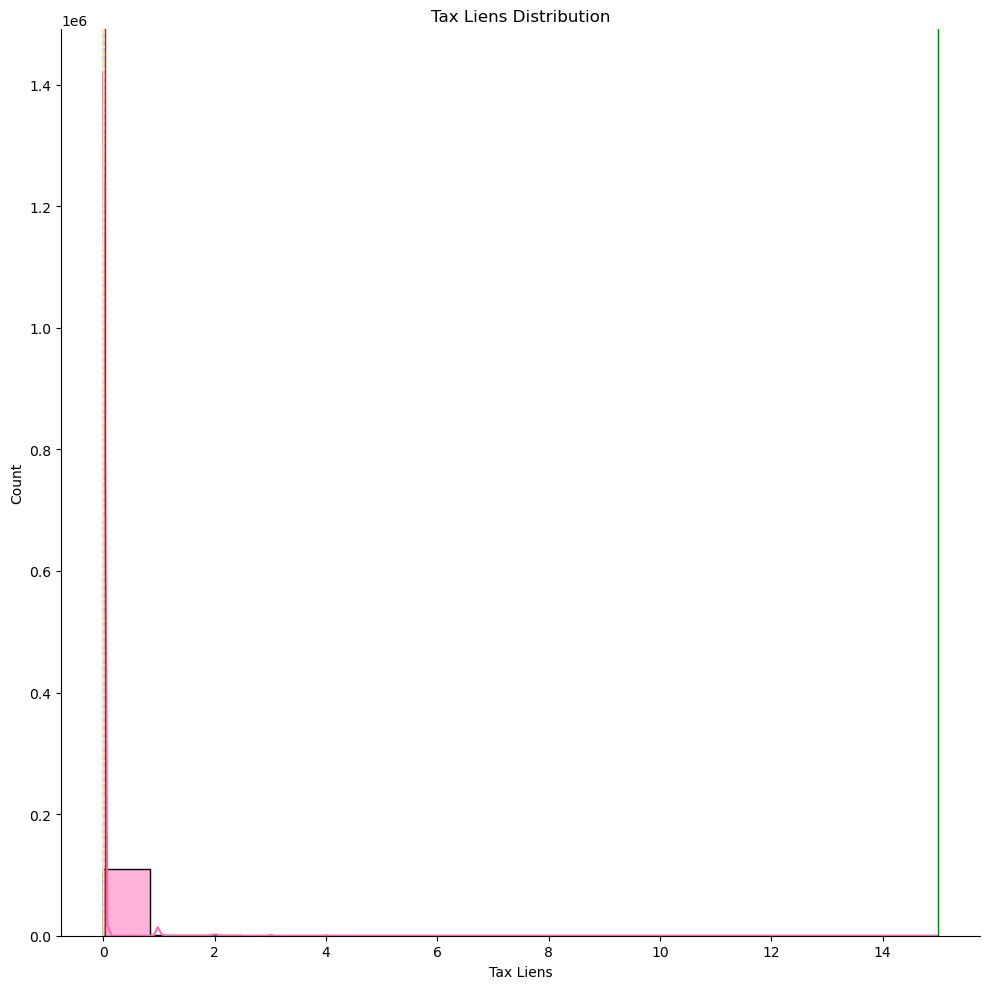

In [16]:
# histogram for annual income
# sns.set_theme(rc = {'figure.figsize':(20,5)})
m = sns.displot(data=df["Tax Liens"],
                kind="hist",
             kde=True,
             color="hotpink",
             height=10,
             )
plt.title("Tax Liens Distribution")


# red line is mean
# blue line is median
# yellow is minimum
# green is maximum

# m.set(xlim=(0, 9000000)) # adjusting the x-axis limits based on the data's min and max
m.map(specs, "Tax Liens")
plt.show()

In [17]:
# since most of the values are 0, we will use mode to fill the missing values
print(f"Number of Tax Liens missing values: {df['Tax Liens'].isnull().sum()}")
df['Tax Liens'] = df['Tax Liens'].fillna(0)
print(f"Number of Tax Liens missing values after filling: {df['Tax Liens'].isnull().sum()}\n")

Number of Tax Liens missing values: 11
Number of Tax Liens missing values after filling: 0



## filling missing values for years in current job

In [18]:
df["Years in current job"].describe()

count        106414
unique           11
top       10+ years
freq          34551
Name: Years in current job, dtype: object

In [19]:
df["Years in current job"].value_counts()

Years in current job
10+ years    34551
2 years      10158
3 years       9133
< 1 year      9055
5 years       7559
1 year        7175
4 years       6828
6 years       6310
7 years       6186
8 years       5105
9 years       4354
Name: count, dtype: int64

c:\Users\izza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


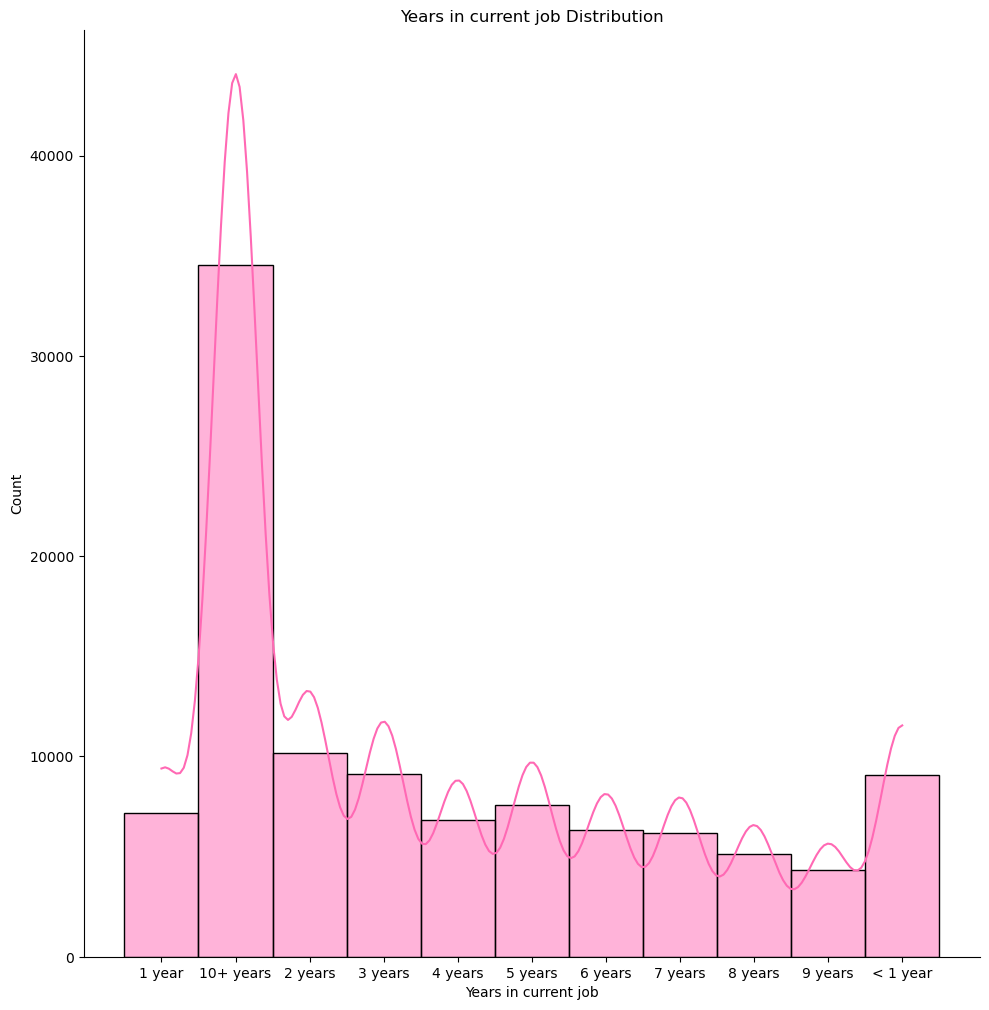

In [20]:
# plotting histogram for years in current job
m = sns.displot(data=df["Years in current job"].sort_values(), # categorical data needs to be sorted (ordinal)
                kind="hist",
             kde=True,
             color="hotpink",
             height=10,
             )
plt.title("Years in current job Distribution")
plt.show()

In [21]:
# since most of the values are 10+ we will use mode to fill the missing values
print(f"Number of Years in current job missing values: {df['Years in current job'].isnull().sum()}")
mode = df['Years in current job'].mode()
print(f"Mode of Years in current job: {mode}")
df['Years in current job'] = df['Years in current job'].fillna('10+ years')
print(f"Number of Years in current job missing values after filling: {df['Years in current job'].isnull().sum()}\n")

Number of Years in current job missing values: 4693
Mode of Years in current job: 0    10+ years
Name: Years in current job, dtype: object
Number of Years in current job missing values after filling: 0



## filling missing values for months since last delinquent

In [22]:
df["Months since last delinquent"].describe()

count    52104.000000
mean        34.902272
std         21.970696
min          0.000000
25%         16.000000
50%         32.000000
75%         51.000000
max        176.000000
Name: Months since last delinquent, dtype: float64

c:\Users\izza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\izza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


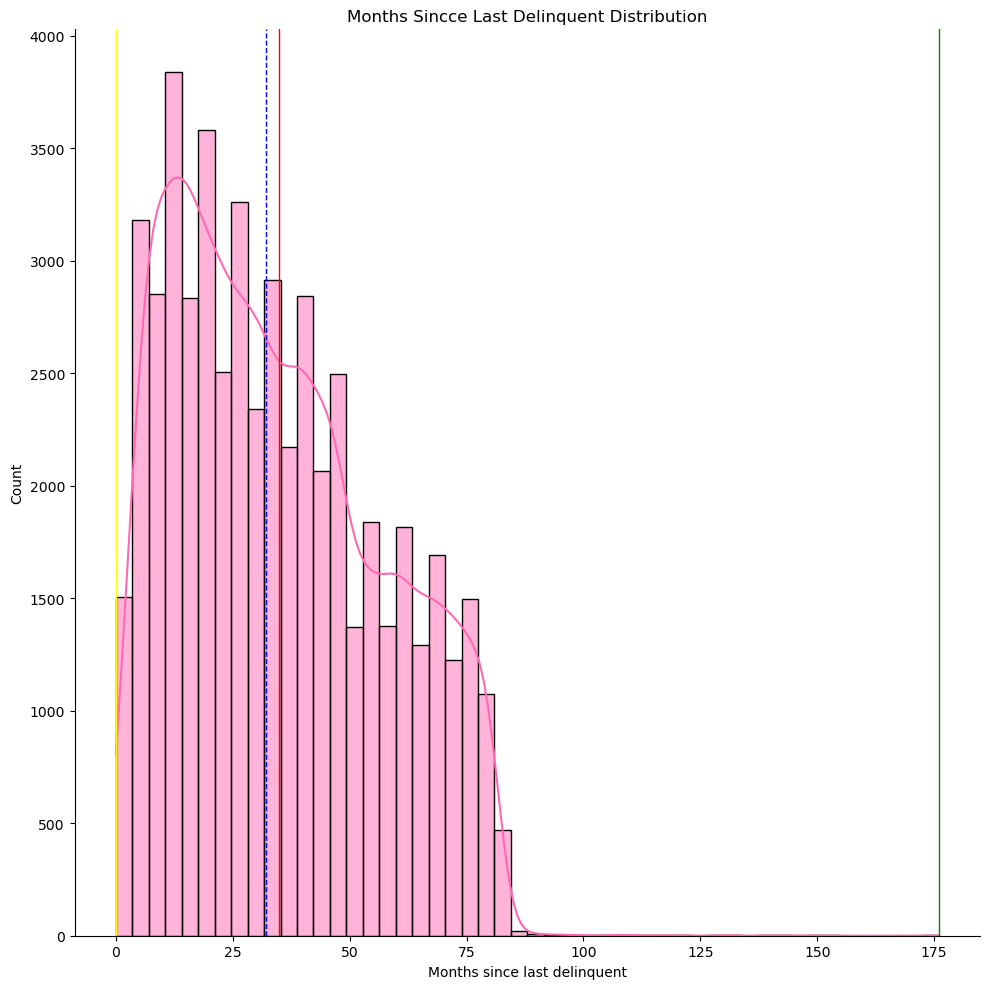

In [23]:
# histogram for months since last delinquent
m = sns.displot(data=df["Months since last delinquent"],
                kind="hist",
             kde=True,
             color="hotpink",
             height=10,
             bins=50
             )
plt.title("Months Sincce Last Delinquent Distribution")


# red line is mean
# blue line is median
# yellow is minimum
# green is maximum

m.map(specs, "Months since last delinquent")
plt.show()

In [24]:
# data is right skewed
# so we will use median to fill the missing values
print(f"Number of Months since last delinquent missing values: {df['Months since last delinquent'].isnull().sum()}")
median = df['Months since last delinquent'].median()
print(f"Median of Months since last delinquent: {median}")
df['Months since last delinquent'] = df['Months since last delinquent'].fillna(median)
print(f"Number of Months since last delinquent missing values after filling: {df['Months since last delinquent'].isnull().sum()}\n")

Number of Months since last delinquent missing values: 59003
Median of Months since last delinquent: 32.0
Number of Months since last delinquent missing values after filling: 0



c:\Users\izza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\izza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


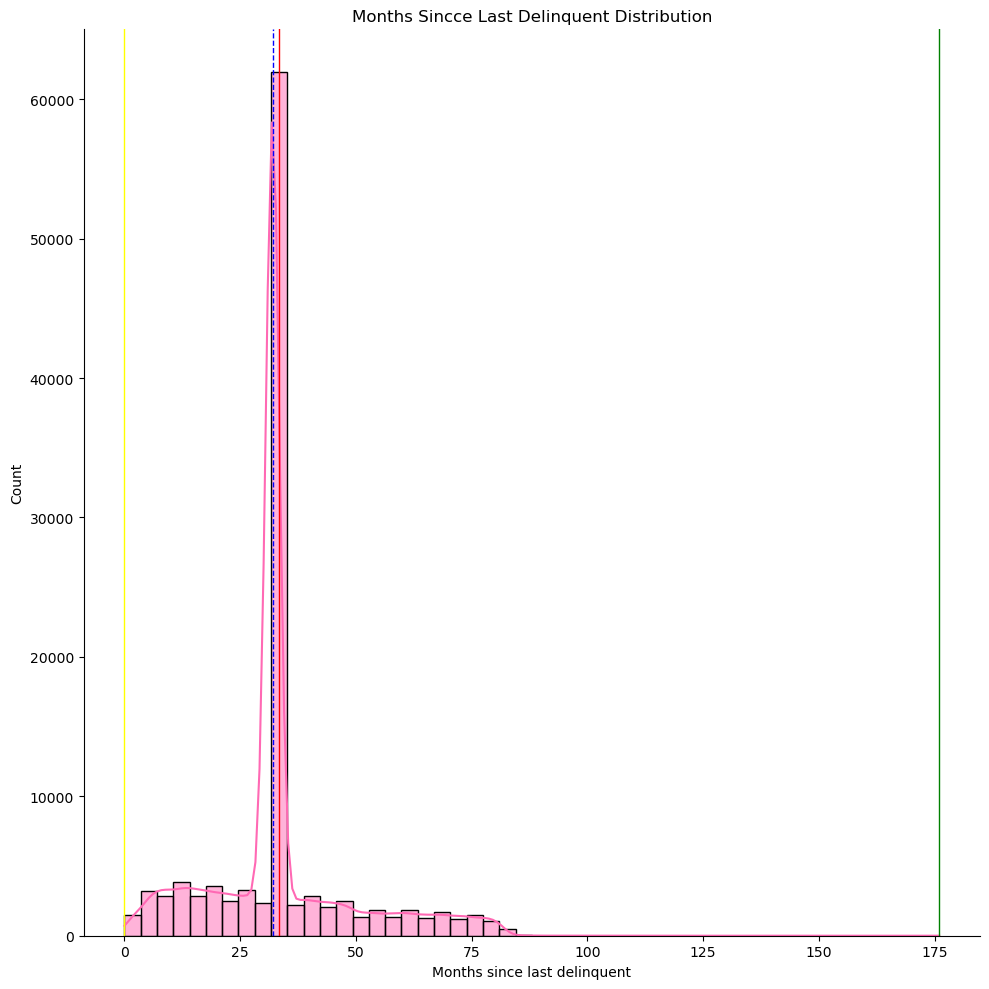

In [25]:
# checking distribution after filling missing values
m = sns.displot(data=df["Months since last delinquent"],
                kind="hist",
             kde=True,
             color="hotpink",
             height=10,
               bins=50
             )
plt.title("Months Sincce Last Delinquent Distribution")


# red line is mean
# blue line is median
# yellow is minimum
# green is maximum

m.map(specs, "Months since last delinquent")
plt.show()

## filling missing values for bankruptcies

In [26]:
df["Bankruptcies"].describe()

count    110879.00000
mean          0.11766
std           0.35142
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           7.00000
Name: Bankruptcies, dtype: float64

In [27]:
# df["Bankruptcies"].head(50)

In [28]:
df["Bankruptcies"].value_counts()

Bankruptcies
0.0    98650
1.0    11613
2.0      468
3.0      110
4.0       27
5.0        8
6.0        2
7.0        1
Name: count, dtype: int64

In [29]:
df["Bankruptcies"].isnull().sum()

228

c:\Users\izza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\izza\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


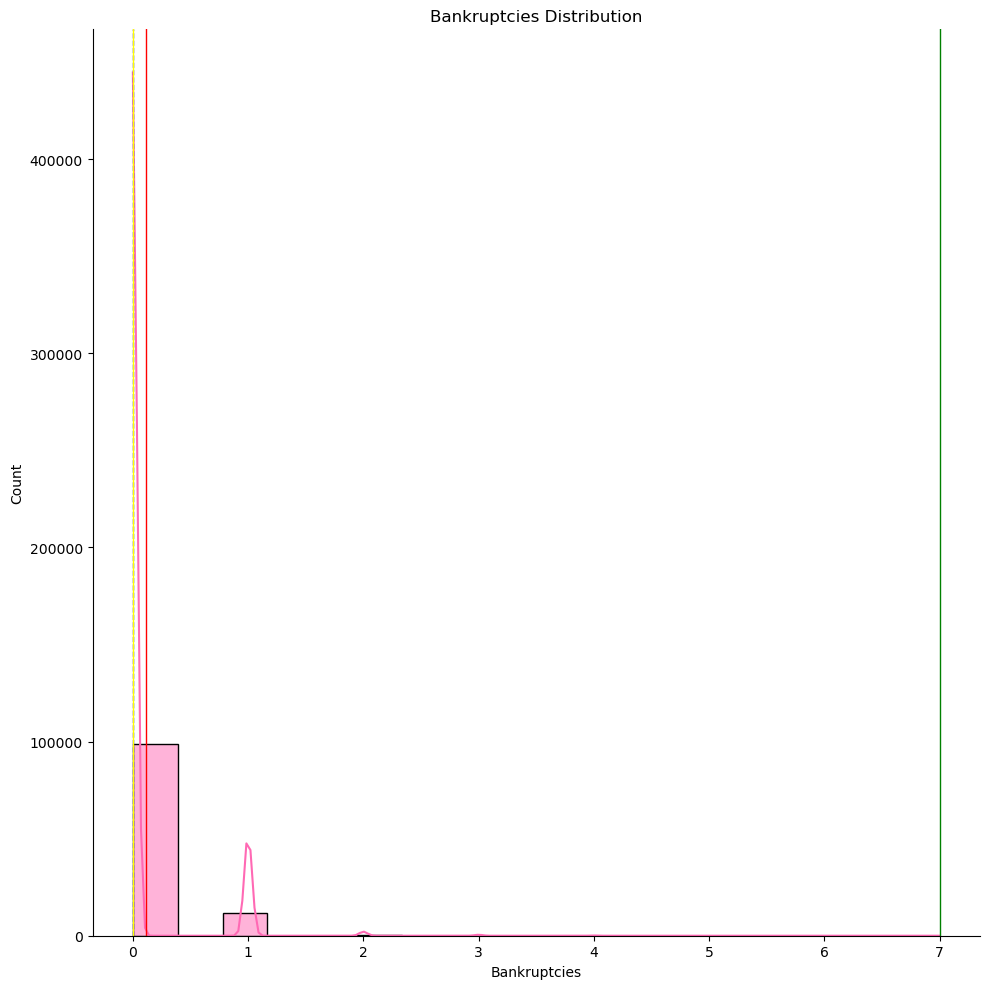

In [30]:
# distribution of bankruptcies
m = sns.displot(data=df["Bankruptcies"],
                kind="hist",
             kde=True,
             color="hotpink",
             height=10,
             )
plt.title("Bankruptcies Distribution")


# red line is mean
# blue line is median
# yellow is minimum
# green is maximum

m.map(specs, "Bankruptcies")
plt.show()

In [31]:
# checking mean, median and mode
print(f"Mean of Bankruptcies: {df['Bankruptcies'].mean()}")
print(f"Median of Bankruptcies: {df['Bankruptcies'].median()}")
print(f"Mode of Bankruptcies: {df['Bankruptcies'].mode()}")

Mean of Bankruptcies: 0.11765979130403413
Median of Bankruptcies: 0.0
Mode of Bankruptcies: 0    0.0
Name: Bankruptcies, dtype: float64


In [32]:
# we will use mode to fill the missing values (it is equal to median)
# we wont use mean as values are integers
print(f"Number of Bankruptcies missing values: {df['Bankruptcies'].isnull().sum()}")
mode = df['Bankruptcies'].mode()
print(f"Mode of Bankruptcies: {mode}")
df['Bankruptcies'] = df['Bankruptcies'].fillna(0)
print(f"Number of Bankruptcies missing values after filling: {df['Bankruptcies'].isnull().sum()}\n")

Number of Bankruptcies missing values: 228
Mode of Bankruptcies: 0    0.0
Name: Bankruptcies, dtype: float64
Number of Bankruptcies missing values after filling: 0



In [33]:
# checking if any missing values are left
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

# finding and replacning outliers

In [34]:
df.shape

(111107, 19)

In [35]:
import pprint
columns = df.select_dtypes(include=["int64", "float64"]).columns
pprint.pprint(list(columns))

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Years of Credit History',
 'Months since last delinquent',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Bankruptcies',
 'Tax Liens']


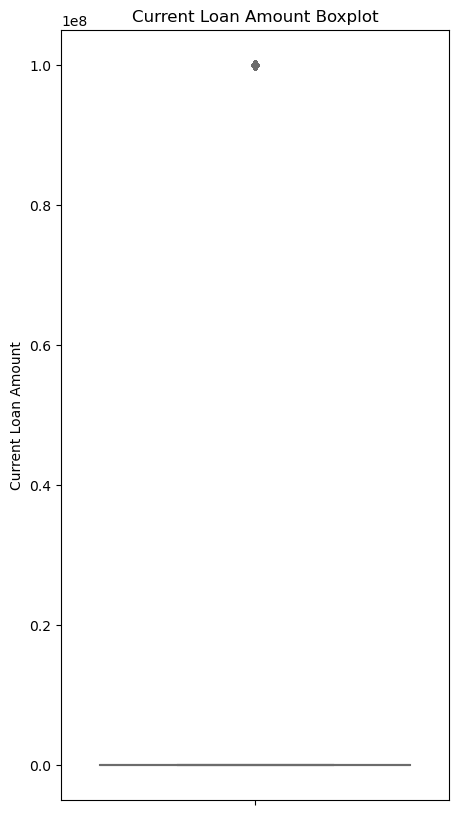

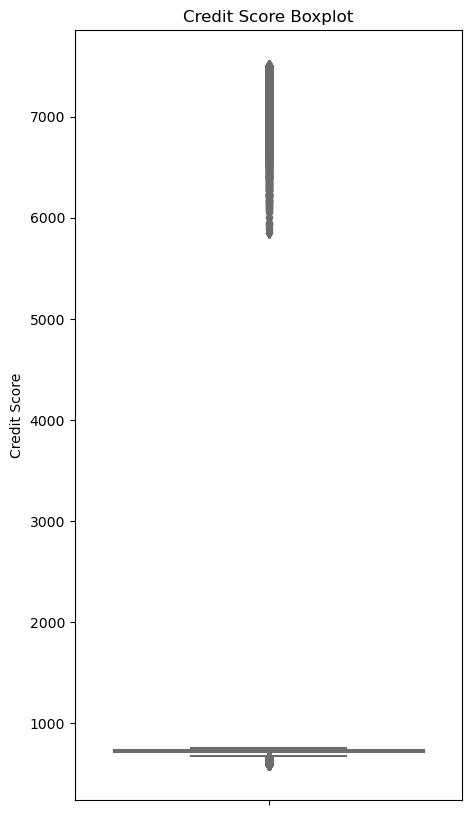

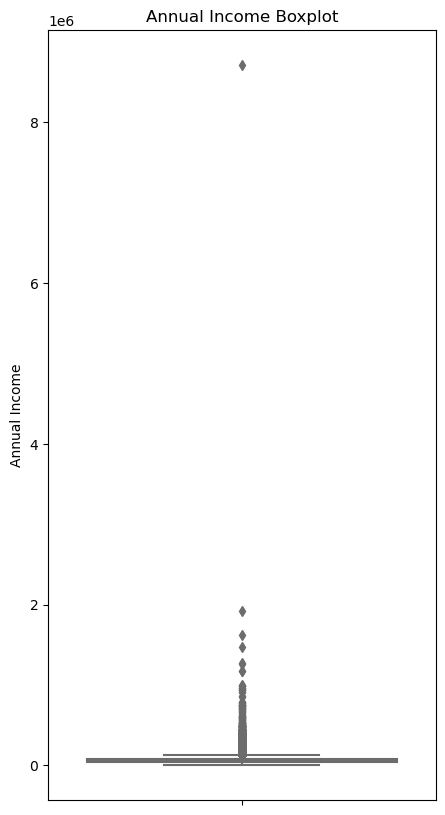

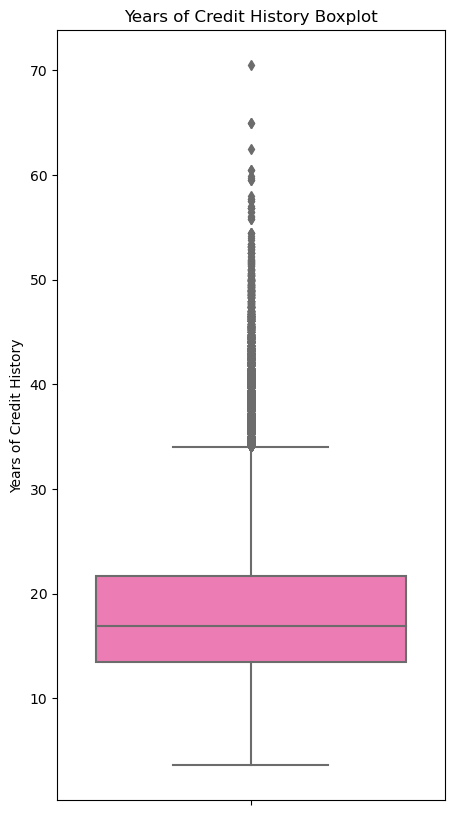

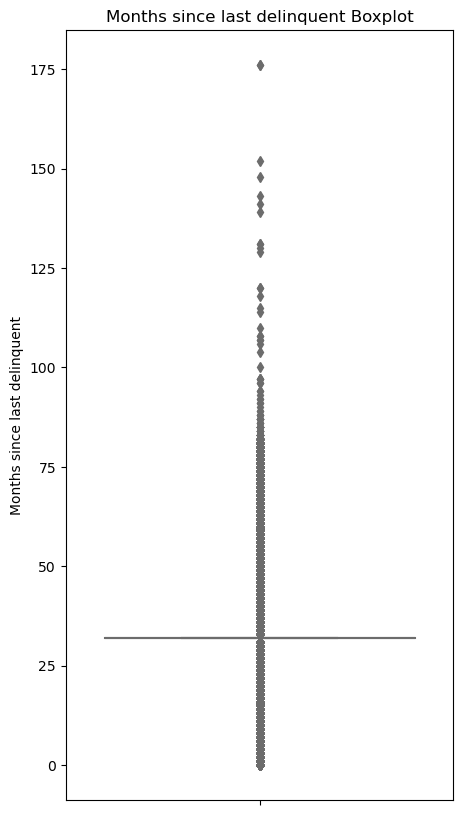

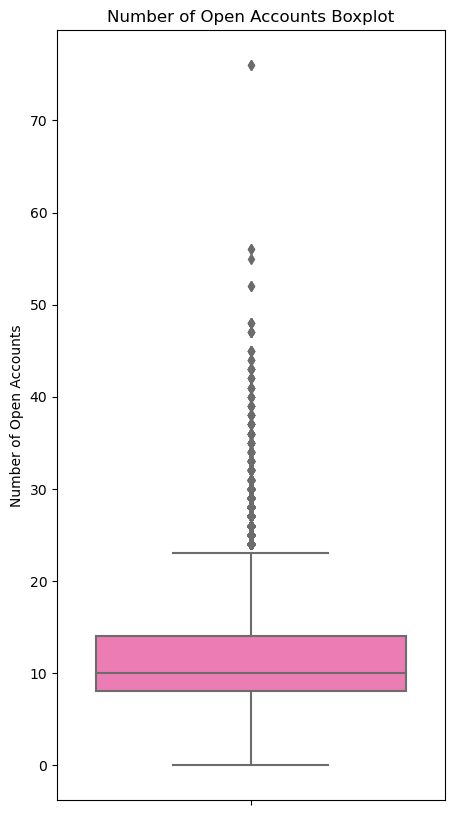

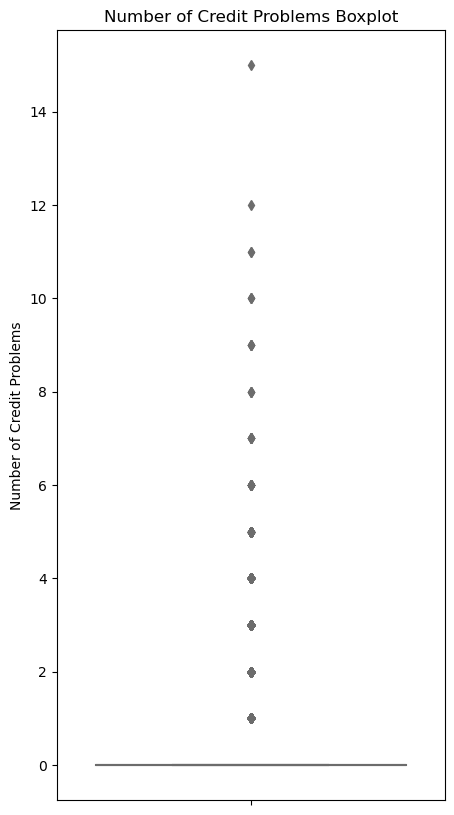

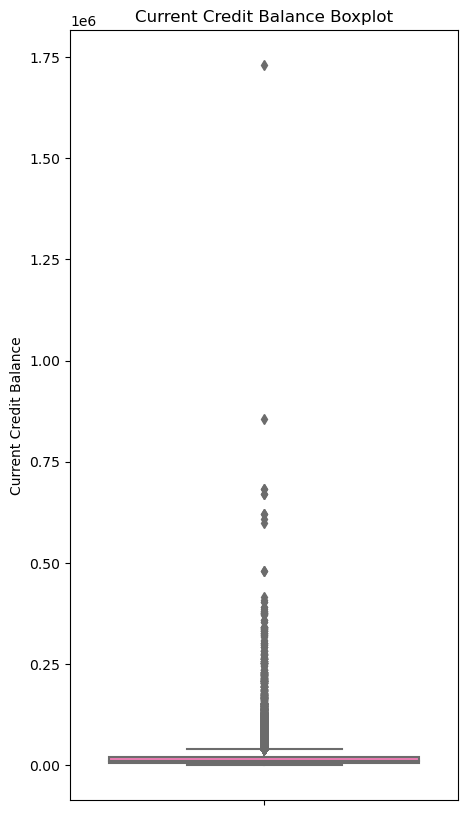

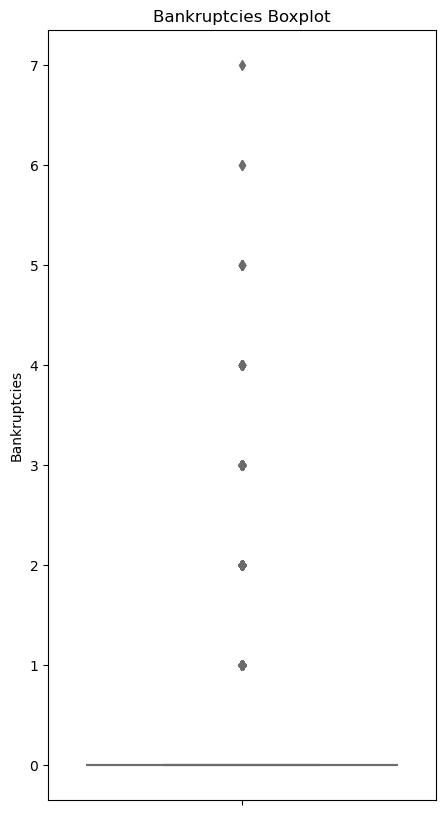

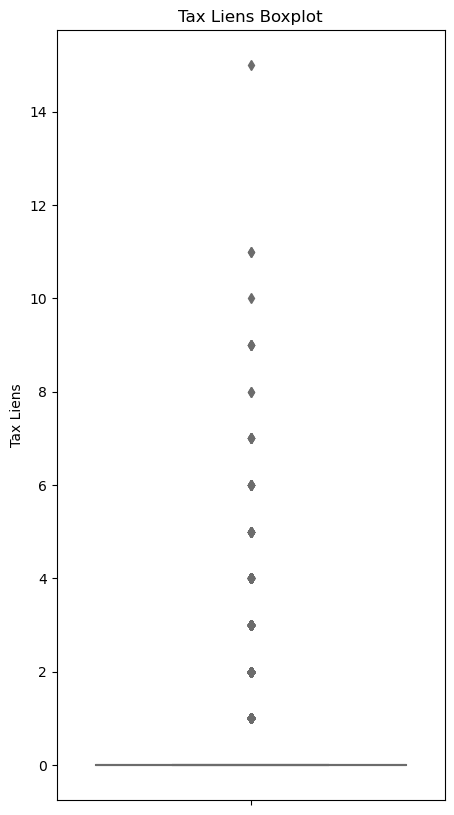

In [36]:
# the above columns are the ones we need to find outliers of (since they are numerical)
for column in columns:
    plt.figure(figsize=(5, 10))
    sns.boxplot(y = df[column], color="hotpink")
    plt.title(f"{column} Boxplot")
    plt.show()

looking at the above plots it is clear we need to fix outliers for
- current credit card balance (with values greater than 0.5)
- number of open accounts (with values greater than 50)
- years of credit history (with values greater than 50)
- annual income (with values greater than 8e+6)

_the rest of the values are ignored because they are either discrete numerical values within a specific range, or the values are so close to the whiskers they can easily be not considered outliers_

In [37]:
# function to find the outliers
def find_outliers(column):
    """function to find the outliers"""
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [38]:
# finding the outliers for Current Credit Card Balance
outliers = find_outliers("Current Credit Balance")
print(f"Number of outliers for Current Credit Card Balance: {len(outliers)}")

# finding outliers with value greater than 0.5e+6
outliers = df[df["Current Credit Balance"] > 0.5e+6]
print(f"Number of outliers for Current Credit Card Balance greater than 0.5e+6: {len(outliers)}")

# replacing these outliers with the median
median = df["Current Credit Balance"].median()
df.loc[df["Current Credit Balance"] > 0.5e+6, "Current Credit Balance"] = median
print(f"Number of outliers for Current Credit Card Balance greater than 0.5e+6 after replacing: {len(df[df['Current Credit Balance'] > 0.5e+6])}")


Number of outliers for Current Credit Card Balance: 5756
Number of outliers for Current Credit Card Balance greater than 0.5e+6: 10
Number of outliers for Current Credit Card Balance greater than 0.5e+6 after replacing: 0


In [39]:
# finding the outliers for Number of Open Accounts
outliers = find_outliers("Number of Open Accounts")
print(f"Number of outliers for Number of Open Accounts: {len(outliers)}")

# finding outliers with value greater than 50
outliers = df[df["Number of Open Accounts"] > 50]
print(f"Number of outliers for Number of Open Accounts greater than 50: {len(outliers)}")

# replacing these outliers with the median
median = df["Number of Open Accounts"].median()
df.loc[df["Number of Open Accounts"] > 50, "Number of Open Accounts"] = median
print(f"Number of outliers for Number of Open Accounts greater than 50 after replacing: {len(df[df['Number of Open Accounts'] > 50])}")


Number of outliers for Number of Open Accounts: 2522
Number of outliers for Number of Open Accounts greater than 50: 7
Number of outliers for Number of Open Accounts greater than 50 after replacing: 0


In [40]:
# finsing the outliers for Years of Credit History
outliers = find_outliers("Years of Credit History")
print(f"Number of outliers for Years of Credit History: {len(outliers)}")

# finding outliers with value greater than 55
outliers = df[df["Years of Credit History"] > 55]
print(f"Number of outliers for Years of Credit History greater than 55: {len(outliers)}")

# `replacing these outliers with the median
median = df["Years of Credit History"].median()
df.loc[df["Years of Credit History"] > 55, "Years of Credit History"] = median
print(f"Number of outliers for Years of Credit History greater than 55 after replacing: {len(df[df['Years of Credit History'] > 55])}")


Number of outliers for Years of Credit History: 3437
Number of outliers for Years of Credit History greater than 55: 26
Number of outliers for Years of Credit History greater than 55 after replacing: 0


In [41]:
# finding the outliers for Annual Income
outliers = find_outliers("Annual Income")
print(f"Number of outliers for Annual Income: {len(outliers)}")

# finding outliers with value greater than 8+e6
outliers = df[df["Annual Income"] > 8e+6]
print(f"Number of outliers for Annual Income greater than 8e+6: {len(outliers)}")

# replacing these outliers with the median
median = df["Annual Income"].median()
df.loc[df["Annual Income"] > 8e+6, "Annual Income"] = median
print(f"Number of outliers for Annual Income greater than 8e+6 after replacing: {len(df[df['Annual Income'] > 8e+6])}")

Number of outliers for Annual Income: 7652
Number of outliers for Annual Income greater than 8e+6: 1
Number of outliers for Annual Income greater than 8e+6 after replacing: 0


## creating new categories

In [45]:
df["Years in current job"].value_counts()

Years in current job
10+ years    39244
2 years      10158
3 years       9133
< 1 year      9055
5 years       7559
1 year        7175
4 years       6828
6 years       6310
7 years       6186
8 years       5105
9 years       4354
Name: count, dtype: int64

In [48]:
df[df["Years in current job"] == "< 1 year"] = "< year" 
df["Years in current job"].value_counts()

Years in current job
10+ years    39244
2 years      10158
3 years       9133
< year        9055
5 years       7559
1 year        7175
4 years       6828
6 years       6310
7 years       6186
8 years       5105
9 years       4354
Name: count, dtype: int64

In [49]:
df[df["Years in current job"] in ["2 years", "3 years", "4 years"]] = "two to four years" 
df["Years in current job"].value_counts()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().